In [17]:
#CIND820- Initial Code By Zion Yitbarek (500883564)
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score

# Saving dataset to Google Colab
if 'df' in locals() or 'df' in globals():
    df.to_csv('retail_strategy_data.csv', index=False)
    print("File saved: retail_strategy_data.csv")
else:
    print("Error: DataFrame 'df' is not defined. Please ensure the cell defining 'df' (e.g., Cell WbCA3RZAlLUL) is executed before running this cell.")

File saved: retail_strategy_data.csv


In [18]:

# Inditex Group figures for CapEx Intensity and Gross Margin are assigned to both Zara and Massimo Dutti.
# Final Validated Dataset (observations: 2018-2023)
data = {
    'Brand': ['Zara', 'Massimo Dutti', 'Brunello Cucinelli'] * 6,
    'Year': sorted([2018] * 3 + [2019] * 3 + [2020] * 3 + [2021] * 3 + [2022] * 3 + [2023] * 3),
  'Revenue_M': [
        18021, 1802, 529.996,  # 2018
        19564, 1900, 607.761,  # 2019
        14129, 1197, 544.013,  # 2020
        19586, 1653, 712.179,  # 2021
        23761, 1593, 919.708,  # 2022
        26050, 1839, 1139.42   # 2023
    ],
#Core Financial Features (X)
    'Gross_Margin_Pct': [43.3, 43.3, 84.1, #2018
                         44.1, 44.1, 88.1, #2019
                         44.1, 44.1, 89.79, #2020
                         42.9, 42.9, 84, #2021
                         43, 43, 89.61, #2022
                         42.2, 42.2, 90], #2023

    'CapEx_M': [            1609, 1609, 45,   #2018
                            1130, 1130, 52.6, #2019
                            713, 713, 51.6, #2020
                            1100, 1100, 61.6, #2021
                            1400, 1400, 87.5, #2022
                            1870, 1870, 79.1] #2023
}

df = pd.DataFrame(data)
df['Is_Luxury'] = df['Brand'].apply(lambda x: 1 if x == 'Brunello Cucinelli' else 0)

# Feature Engineering: Current Year's Growth (used as a feature)
df['YoY_Growth_Rate'] = df.groupby('Brand')['Revenue_M'].pct_change() * 100

# Target Variable (Y): Next Year's Growth (Measure of Resilience)
df['Target_Next_Year_Growth'] = df.groupby('Brand')['YoY_Growth_Rate'].shift(-1)




In [19]:
 # Stating the three required machine learning algorithms I am using.
 models = {
    "Linear Regression (Baseline)": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
 }
 # Defined the Cross-Validation
 cv = KFold(n_splits=4, shuffle=True, random_state=42)
 results = []
 # Looping through models to observe performance (MAE and R2)
 for name, model in models.items():
    # Mean Absolute Error (MAE) and R-squared (R2)
    mae_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')
    mean_mae = -mae_scores.mean()

    mean_r2 = r2_scores.mean()
    results.append({
        'Algorithm': name,
        'Cross-Validated MAE': f"{mean_mae:.2f}",
        'Cross-Validated R2': f"{mean_r2:.2f}"
    })
 # Display the results
 results_df = pd.DataFrame(results)
 print("--- Table 1: Comparative Cross-Validation Results ---")
 print(results_df.to_markdown(index=False))
 rf_model = models["Random Forest Regressor"]
 rf_model.fit(X, Y)
 feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
 print("\n--- Table 2: Random Forest Feature Importance (Insights) ---")
 print(feature_importances.to_markdown(numalign="left", stralign="left"))

--- Table 1: Comparative Cross-Validation Results ---
| Algorithm                    |   Cross-Validated MAE |   Cross-Validated R2 |
|:-----------------------------|----------------------:|---------------------:|
| Linear Regression (Baseline) |                 71.91 |               -33.37 |
| Random Forest Regressor      |                 19.56 |                -0.32 |
| Gradient Boosting Regressor  |                 22.11 |                -1.67 |

--- Table 2: Random Forest Feature Importance (Insights) ---
|                  | 0         |
|:-----------------|:----------|
| CapEx_M          | 0.373721  |
| YoY_Growth_Rate  | 0.319491  |
| Revenue_M        | 0.15579   |
| Gross_Margin_Pct | 0.141286  |
| Is_Luxury        | 0.0097123 |


In [16]:
correlation_matrix = df.corr(numeric_only=True)
print("--- Correlation Matrix ---")
print(correlation_matrix.round(3).to_markdown())

--- Correlation Matrix ---
|                         |   Year |   Revenue_M |   Gross_Margin_Pct |   CapEx_M |   Is_Luxury |   YoY_Growth_Rate |   Target_Next_Year_Growth |
|:------------------------|-------:|------------:|-------------------:|----------:|------------:|------------------:|--------------------------:|
| Year                    |  1     |       0.109 |              0.006 |     0.13  |      -0     |             0.354 |                     0.354 |
| Revenue_M               |  0.109 |       1     |             -0.522 |     0.526 |      -0.52  |             0.07  |                    -0.088 |
| Gross_Margin_Pct        |  0.006 |      -0.522 |              1     |    -0.892 |       0.997 |             0.208 |                     0.23  |
| CapEx_M                 |  0.13  |       0.526 |             -0.892 |     1     |      -0.886 |            -0.006 |                    -0.332 |
| Is_Luxury               | -0     |      -0.52  |              0.997 |    -0.886 |       1     |


--- Comparative Growth Summary (2019-2023) ---
| Brand              |   mean |   std |
|:-------------------|-------:|------:|
| Brunello Cucinelli |  17.63 | 16.94 |
| Massimo Dutti      |   3.67 | 27.54 |
| Zara               |  10.07 | 24.38 |


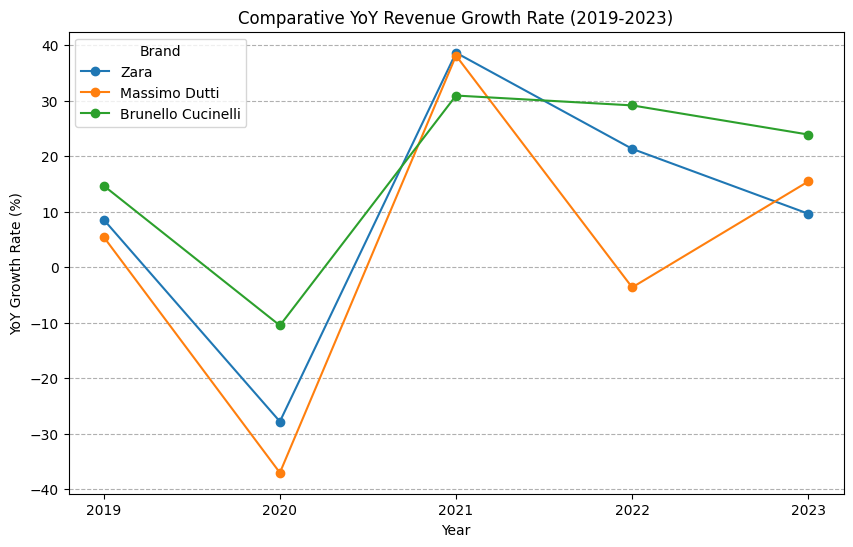

In [13]:

growth_summary = df.dropna(subset=['YoY_Growth_Rate']).groupby('Brand')['YoY_Growth_Rate'].agg(['mean', 'std'])

print("\n--- Comparative Growth Summary (2019-2023) ---")
print(growth_summary.round(2).to_markdown())

import matplotlib.pyplot as plt


df_plot = df.dropna(subset=['YoY_Growth_Rate'])

plt.figure(figsize=(10, 6))
plt.title('Comparative YoY Revenue Growth Rate (2019-2023)')
plt.xlabel('Year')
plt.ylabel('YoY Growth Rate (%)')
plt.grid(axis='y', linestyle='--')

for brand in df_plot['Brand'].unique():
    brand_data = df_plot[df_plot['Brand'] == brand]
    plt.plot(brand_data['Year'], brand_data['YoY_Growth_Rate'],
             marker='o', label=brand)

plt.legend(title='Brand')
plt.xticks(df_plot['Year'].unique())
plt.show()

In [23]:
import numpy as np
from sklearn.cluster import KMeans


clustering_features = ['Gross_Margin_Pct', 'CapEx_M', 'YoY_Growth_Rate']
X_cluster = df[clustering_features].dropna()

print("Data prepared for K-Means. Total observations to cluster:", X_cluster.shape[0])

from sklearn.cluster import KMeans

#Define the number of clusters (k=3)
k = 3

# 2. Run K-Means
# X_cluster is the clean data
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_cluster)

# add cluster labels back to the DataFrame
df.loc[X_cluster.index, 'Cluster'] = cluster_labels.astype(int)

# Calculatemean values of features for each cluster
clustering_features = ['Gross_Margin_Pct', 'CapEx_M', 'YoY_Growth_Rate']
cluster_analysis = df.groupby('Cluster')[clustering_features + ['Brand']].agg({
    'Gross_Margin_Pct': 'mean',
    'CapEx_M': 'mean',
    'YoY_Growth_Rate': 'mean',
    'Brand': 'first' # Use 'first' to get a representative brand for the output table
})

# Add count of observations per cluster
cluster_analysis['Count'] = df.groupby('Cluster').size()
cluster_analysis = cluster_analysis.rename(columns={'Brand': 'Representative_Brand'})


print("--- K-Means Cluster Analysis (k=3) ---")
print(cluster_analysis.round(2).to_markdown())

# show what brands are in what clusters
full_cluster_composition = df.dropna(subset=['Cluster']).groupby('Cluster')['Brand'].value_counts().unstack(fill_value=0)
print("\n--- Cluster Composition by Brand ---")
print(full_cluster_composition.to_markdown())

Data prepared for K-Means. Total observations to cluster: 15
--- K-Means Cluster Analysis (k=3) ---
|   Cluster |   Gross_Margin_Pct |   CapEx_M |   YoY_Growth_Rate | Representative_Brand   |   Count |
|----------:|-------------------:|----------:|------------------:|:-----------------------|--------:|
|         0 |              88.3  |     66.48 |             17.63 | Brunello Cucinelli     |       5 |
|         1 |              42.2  |   1870    |             12.54 | Zara                   |       2 |
|         2 |              43.52 |   1085.75 |              5.45 | Zara                   |       8 |

--- Cluster Composition by Brand ---
|   Cluster |   Brunello Cucinelli |   Massimo Dutti |   Zara |
|----------:|---------------------:|----------------:|-------:|
|         0 |                    5 |               0 |      0 |
|         1 |                    0 |               1 |      1 |
|         2 |                    0 |               4 |      4 |


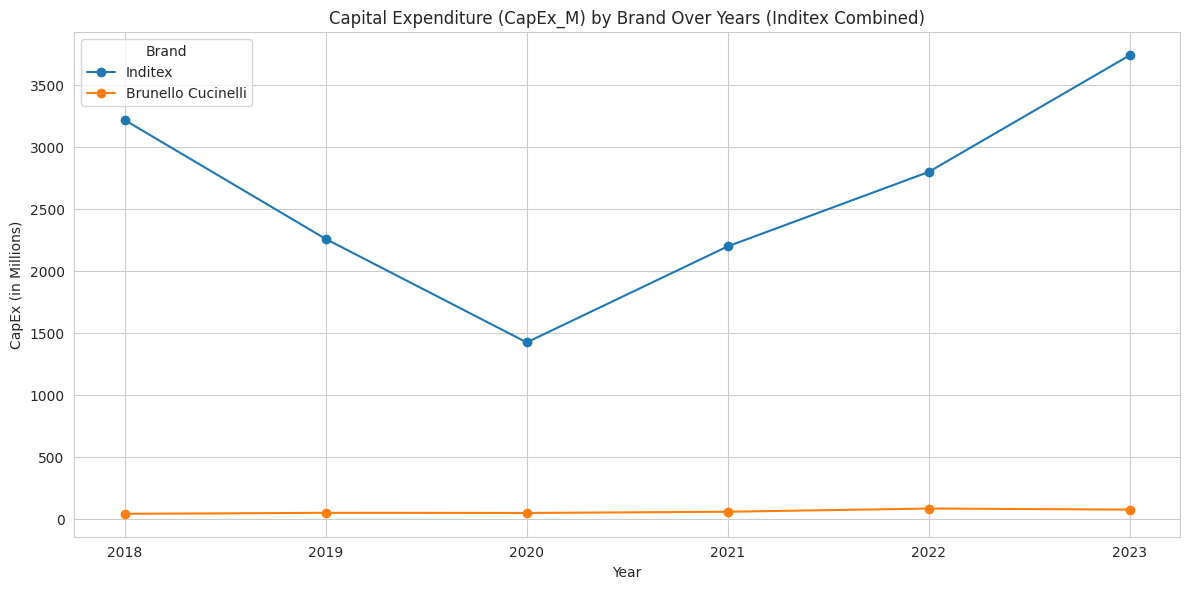

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inditex Group figures for CapEx Intensity and Gross Margin are assigned to both Zara and Massimo Dutti.
# Final Validated Dataset (observations: 2018-2023)
data = {
    'Brand': ['Zara', 'Massimo Dutti', 'Brunello Cucinelli'] * 6,
    'Year': sorted([2018] * 3 + [2019] * 3 + [2020] * 3 + [2021] * 3 + [2022] * 3 + [2023] * 3),
  'Revenue_M': [
        18021, 1802, 529.996,  # 2018
        19564, 1900, 607.761,  # 2019
        14129, 1197, 544.013,  # 2020
        19586, 1653, 712.179,  # 2021
        23761, 1593, 919.708,  # 2022
        26050, 1839, 1139.42   # 2023
    ],
#Core Financial Features (X)
    'Gross_Margin_Pct': [43.3, 43.3, 84.1, #2018
                         44.1, 44.1, 88.1, #2019
                         44.1, 44.1, 89.79, #2020
                         42.9, 42.9, 84, #2021
                         43, 43, 89.61, #2022
                         42.2, 42.2, 90], #2023

    'CapEx_M': [            1609, 1609, 45,   #2018
                            1130, 1130, 52.6, #2019
                            713, 713, 51.6, #2020
                            1100, 1100, 61.6, #2021
                            1400, 1400, 87.5, #2022
                            1870, 1870, 79.1] #2023
}

df = pd.DataFrame(data)
df['Is_Luxury'] = df['Brand'].apply(lambda x: 1 if x == 'Brunello Cucinelli' else 0)

# Feature Engineering: Current Year's Growth (used as a feature)
df['YoY_Growth_Rate'] = df.groupby('Brand')['Revenue_M'].pct_change() * 100

# Target Variable (Y): Next Year's Growth (Measure of Resilience)
df['Target_Next_Year_Growth'] = df.groupby('Brand')['YoY_Growth_Rate'].shift(-1)

# Aggregate Zara and Massimo Dutti into 'Inditex'
inditex_capex = df[df['Brand'].isin(['Zara', 'Massimo Dutti'])].groupby('Year')['CapEx_M'].sum().reset_index()
inditex_capex['Brand'] = 'Inditex'

# Get data for Brunello Cucinelli
brune_capex = df[df['Brand'] == 'Brunello Cucinelli'][['Year', 'CapEx_M', 'Brand']]

# Combine the aggregated Inditex data and Brunello Cucinelli data
plot_df = pd.concat([inditex_capex, brune_capex], ignore_index=True)

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Plot CapEx_M for each brand over the years from the new plot_df
for brand in plot_df['Brand'].unique():
    brand_data = plot_df[plot_df['Brand'] == brand]
    plt.plot(brand_data['Year'], brand_data['CapEx_M'], marker='o', label=brand)

plt.title('Capital Expenditure (CapEx_M) by Brand Over Years (Inditex Combined)')
plt.xlabel('Year')
plt.ylabel('CapEx (in Millions)')
plt.xticks(df['Year'].unique())
plt.legend(title='Brand')
plt.grid(True)
plt.tight_layout()
plt.show()